In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import urllib.request
import fastobo


In [7]:
with urllib.request.urlopen("https://current.geneontology.org/ontology/go-basic.obo") as response:
    pato = fastobo.load(response)

In [9]:
knowledge_graph = nx.DiGraph()

In [10]:
for frame in pato:
    if isinstance(frame, fastobo.term.TermFrame):
        knowledge_graph.add_node(str(frame.id))
        for clause in frame:
            if isinstance(clause, fastobo.term.IsAClause):
                knowledge_graph.add_edge(str(frame.id), str(clause.term))

In [12]:
nx.is_directed_acyclic_graph(knowledge_graph)

True

In [15]:
superclass_nodes = nx.descendants(knowledge_graph, "GO:1901174")
superclass_nodes.add("GO:1901174")
super_graph = knowledge_graph.subgraph(superclass_nodes)

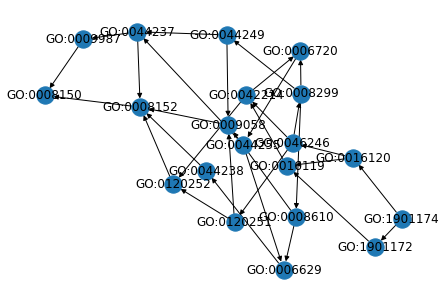

In [18]:
from networkx.drawing.nx_agraph import graphviz_layout

nx.draw(super_graph, with_labels=True, arrows=True)

In [27]:
knowledge_graph.number_of_nodes()

47904

In [2]:
df_datos = pd.read_json('Datos/go_yeast.json', orient='index')
df_datos.head()

,0
graphs,{'id': 'http://purl.obolibrary.org/obo/go/subs...


In [3]:
import json

In [4]:
# Cargar el archivo JSON
with open('Datos/go_yeast.json') as f:
    data = json.load(f)

In [5]:
print(data['graphs'][0].keys())

dict_keys(['id', 'meta', 'nodes', 'edges', 'logicalDefinitionAxioms', 'propertyChainAxioms'])


In [6]:
data['graphs'][0]['edges'][:3] #Entiendo que es cada elemento de la lista de enlaces un diccionario de "fulanito ES O HACE ALGO de mengano"

[{'sub': 'http://purl.obolibrary.org/obo/GO_0000054',
  'pred': 'is_a',
  'obj': 'http://purl.obolibrary.org/obo/GO_0051169'},
 {'sub': 'http://purl.obolibrary.org/obo/GO_0000278',
  'pred': 'is_a',
  'obj': 'http://purl.obolibrary.org/obo/GO_0008150'},
 {'sub': 'http://purl.obolibrary.org/obo/GO_0000278',
  'pred': 'http://purl.obolibrary.org/obo/BFO_0000051',
  'obj': 'http://purl.obolibrary.org/obo/GO_0048285'}]

In [ ]:
data['graphs'][0]['nodes'][:5] #Creo que cada nodo es una acción o descripción de algo "forma parte, procede de, ocurre en" y tienen un numero de id asignado



[{'id': 'http://purl.obolibrary.org/obo/BFO_0000050',
  'lbl': 'part of',
  'type': 'PROPERTY',
  'meta': {'xrefs': [{'val': 'BFO:0000050'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'part_of'}]}},
 {'id': 'http://purl.obolibrary.org/obo/BFO_0000051',
  'lbl': 'has part',
  'type': 'PROPERTY',
  'meta': {'xrefs': [{'val': 'BFO:0000051'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'has_part'}]}},
 {'id': 'http://purl.obolibrary.org/obo/BFO_0000062',
  'lbl': 'preceded by',
  'meta': {'xrefs': [{'val': 'BFO:0000062'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http:

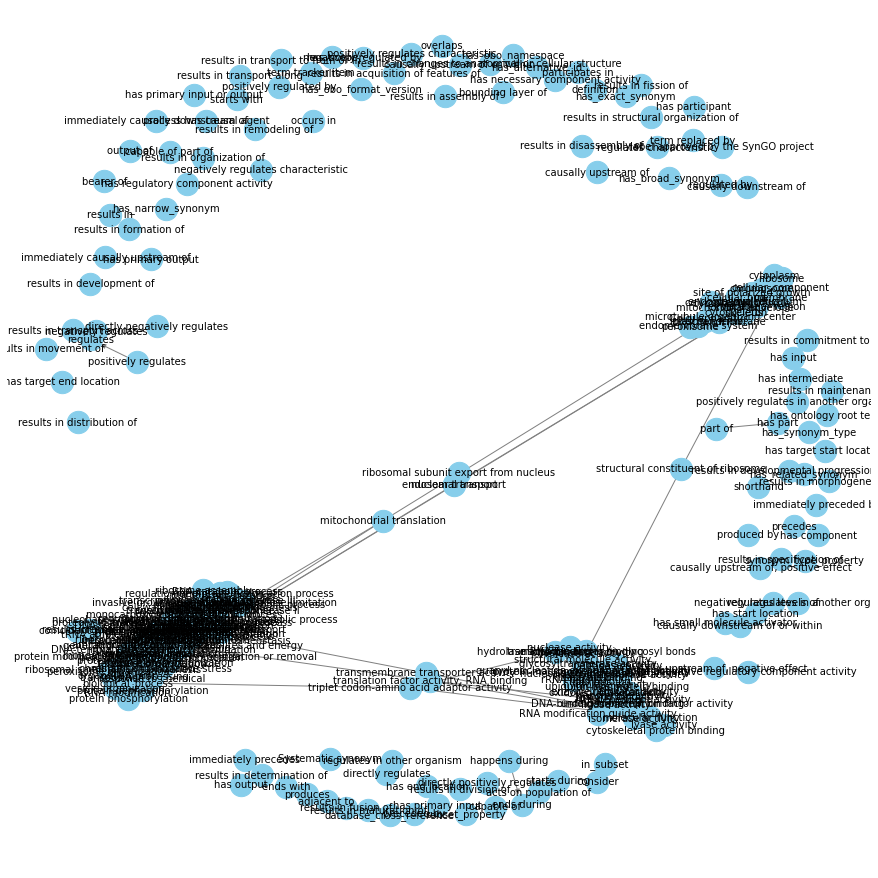

In [ ]:
G = nx.DiGraph()

# Iterar a través de los gráficos en graphs
for graph in data["graphs"]:
    # Agregar nodos al grafo
    for node in graph.get("nodes", []):
        node_id = node["id"]
        node_label = node.get("lbl", "")
        G.add_node(node_id, label=node_label, type=node.get("type"))
    
    # Agregar aristas (relaciones) al grafo si existen
    for edge in graph.get("edges", []):
        source = edge["sub"]
        target = edge["obj"]
        relation_type = edge.get("pred", "")
        G.add_edge(source, target, relation=relation_type)

# Visualizar el grafo (opcional)
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color="skyblue", edge_color="gray", labels=nx.get_node_attributes(G, 'label'))
plt.show()

In [65]:
from collections import deque

In [66]:
# Crear un diccionario para almacenar el nivel de cada nodo
levels = {}

# Encuentra el nodo raíz (nodo sin predecesores)
root_nodes = [n for n, d in G.in_degree() if d == 0]

# Si hay varios nodos raíz, procesarlos por separado
for root in root_nodes:
    # Usar una cola para el recorrido BFS
    queue = deque([(root, 0)])  # (nodo, nivel)

    while queue:
        node, level = queue.popleft()
        
        # Si ya se ha calculado el nivel del nodo, continuamos
        if node in levels:
            continue
        
        # Almacenar el nivel del nodo
        levels[node] = level

        # Agregar los vecinos con un nivel aumentado en 1
        for neighbor in G.successors(node):
            queue.append((neighbor, level + 1))

# Verificar los niveles de cada nodo
for node, level in levels.items():
    print(f"Nodo: {node}, Nivel: {level}")

Nodo: http://purl.obolibrary.org/obo/BFO_0000050, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/BFO_0000051, Nivel: 1
Nodo: http://purl.obolibrary.org/obo/BFO_0000062, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/BFO_0000063, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/BFO_0000066, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GOREL_0000040, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GOREL_0001019, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GOREL_0002003, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GOREL_0002004, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GOREL_0012006, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GO_0000054, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GO_0051169, Nivel: 1
Nodo: http://purl.obolibrary.org/obo/GO_0008150, Nivel: 2
Nodo: http://purl.obolibrary.org/obo/GO_0005575, Nivel: 2
Nodo: http://purl.obolibrary.org/obo/GO_0000278, Nivel: 0
Nodo: http://purl.obolibrary.org/obo/GO_0048285, Nivel: 1
Nodo: http://purl.obolibrary.org/obo/GO_0000747, Niv

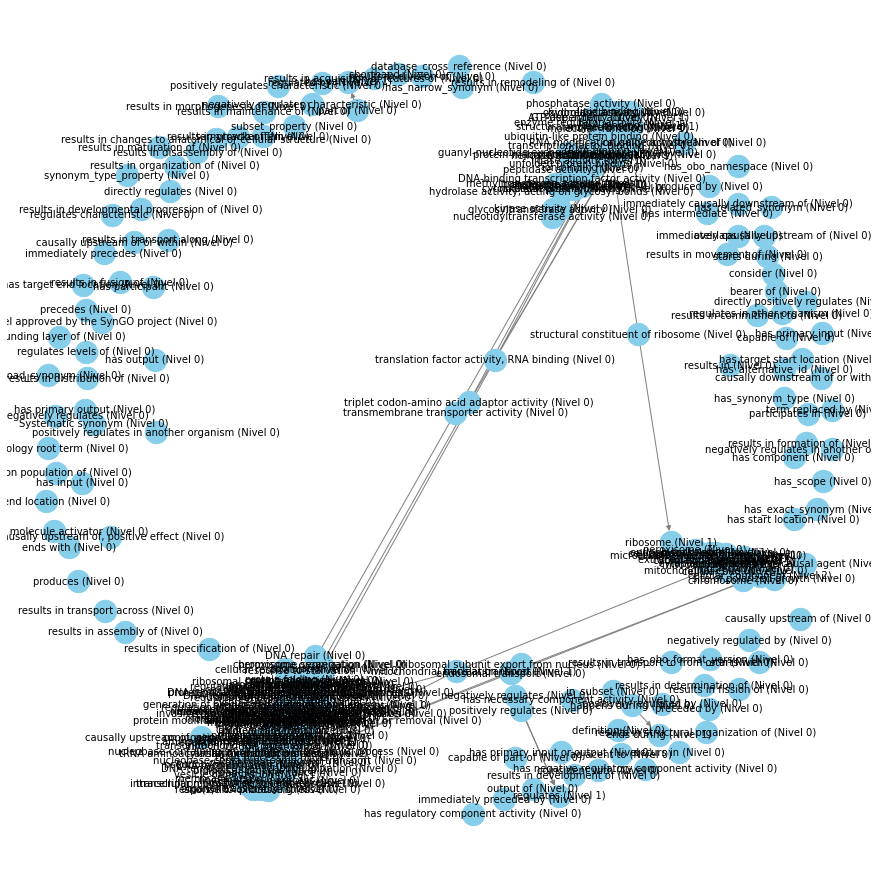

In [71]:
# Asignar niveles a los nodos para visualización
node_labels = {node: f"{data['label']} (Nivel {levels[node]})" for node, data in G.nodes(data=True)}

# Dibujar el grafo
plt.figure(figsize=(12, 12))
nx.draw(G, labels=node_labels, with_labels=True, node_size=500, font_size=10, node_color="skyblue", edge_color="gray")
plt.show()

In [9]:
# Cargar el archivo GAF descargado (aquí usamos el de SGD como ejemplo)
gaf_df = pd.read_csv('Datos/gene_association.sgd.20241028.gaf', sep='\t', comment='!', header=None)

# Extraer sólo las columnas de proteína y término GO
gaf_df = gaf_df[[1, 4]]
gaf_df.columns = ['protein_id', 'go_term_id']

# Ver los datos filtrados de proteínas y términos GO
print(gaf_df.head())

   protein_id  go_term_id
0  S000003381  GO:0090640
1  S000005701  GO:0090640
2  S000003381  GO:0036151
3  S000004492  GO:0033617
4  S000004977  GO:0052845


C:\Users\arell\AppData\Local\Temp\ipykernel_12460\2829194585.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  gaf_df = pd.read_csv('Datos/gene_association.sgd.20241028.gaf', sep='\t', comment='!', header=None)


In [12]:
gaf_df = pd.read_csv('Datos/gene_association.sgd.20241028.gaf', sep='\t', comment='!', header=None)
gaf_df

C:\Users\arell\AppData\Local\Temp\ipykernel_12460\1799236254.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  gaf_df = pd.read_csv('Datos/gene_association.sgd.20241028.gaf', sep='\t', comment='!', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,SGD,S000003381,GPC1,acts_upstream_of_or_within,GO:0090640,PMID:30514764,IGI,SGD:S000005701,P,Glycerophosphocholine acyltransferase (GPCAT),YGR149W|glycerophosphocholine acyltransferase,protein,taxon:559292,20181220,SGD,NaN,UniProtKB:P48236
1,SGD,S000005701,ALE1,acts_upstream_of_or_within,GO:0090640,PMID:30514764,IGI,SGD:S000003381,P,Broad-specificity lysophospholipid acyltransfe...,YOR175C|SLC4|LPT1|LCA1|lysophospholipid acyltr...,protein,taxon:559292,20181220,SGD,NaN,UniProtKB:Q08548
2,SGD,S000003381,GPC1,acts_upstream_of_or_within,GO:0036151,PMID:30514764,IMP,NaN,P,Glycerophosphocholine acyltransferase (GPCAT),YGR149W|glycerophosphocholine acyltransferase,protein,taxon:559292,20181220,SGD,NaN,UniProtKB:P48236
3,SGD,S000004492,RCF1,acts_upstream_of_or_within,GO:0033617,PMID:29746825,IMP,NaN,P,Cytochrome c oxidase subunit,YML030W|AIM31,protein,taxon:559292,20181212,SGD,NaN,UniProtKB:Q03713
4,SGD,S000004977,SIW14,enables,GO:0052845,PMID:26828065,IDA,NaN,F,Inositol phosphatase involved in inositol pyro...,YNL032W|OCA3|putative tyrosine protein phospha...,protein,taxon:559292,20190110,SGD,part_of(GO:0071543),UniProtKB:P53965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206943,SGD,S000006502,SNR42,located_in,GO:0005730,PMID:30502926,IEA,Rfam:RF01265,C,H/ACA box small nucleolar RNA (snoRNA),YNCK0020C|snR42,snoRNA,taxon:559292,20241014,RNAcentral,NaN,NaN
206944,SGD,S000007313,SNR79,located_in,GO:0005730,PMID:30502926,IEA,Rfam:RF01184,C,C/D box small nucleolar RNA (snoRNA),YNCL0005C|Z9|snR79,snoRNA,taxon:559292,20241014,RNAcentral,NaN,NaN
206945,SGD,S000007300,SNR36,located_in,GO:0005730,PMID:30502926,IEA,Rfam:RF01242,C,H/ACA box small nucleolar RNA (snoRNA),YNCO0022C|snR36,snoRNA,taxon:559292,20241014,RNAcentral,NaN,NaN
206946,SGD,S000006484,RDN25-1,located_in,GO:0005840,PMID:30502926,IEA,Rfam:RF02543,C,25S ribosomal RNA (25S rRNA),YNCL0012C|25S ribosomal RNA|26S rRNA|RDN25,rRNA,taxon:559292,20241014,RNAcentral,NaN,NaN


In [ ]:
#1 es codigo de proteina en levadura, 4 es el termino GO, 10 nombre que me interesa(hasta el |)

In [13]:
gaf_df[4]

0         GO:0090640
1         GO:0090640
2         GO:0036151
3         GO:0033617
4         GO:0052845
             ...    
206943    GO:0005730
206944    GO:0005730
206945    GO:0005730
206946    GO:0005840
206947    GO:0005840
Name: 4, Length: 206948, dtype: object